In [1]:
#Generate vector embedding using tokenizer

In [2]:
import pandas as pd
import numpy as np
import string
from collections import Counter
from sklearn.model_selection import train_test_split
import csv
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import files
import io

In [3]:
embedding_dim = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [4]:
uploaded = files.upload()

Saving test_features.csv to test_features (1).csv
Saving train_features.csv to train_features (1).csv
Saving train_labels.csv to train_labels (1).csv


In [5]:
# turn a seq into clean tokens
def clean_seq(filename):
    seq_df = pd.read_csv(filename)
    sequences = seq_df['dna'].str.replace('[^ACGT]','N')
    for i in range(len(sequences)):
        sequences[i] = sequences[i].ljust(1058,'N')
    sequences_array = np.array(sequences)
    
    seq_list_truncated = []
    for i in range(len(sequences_array)):
        list_seq = list(sequences_array[i])
        del list_seq[650:]
        seq_list_truncated.append(''.join(list_seq))
    
    #print(np.array(seq_list_truncated).shape)
    
    token_list = []
    
    for i in range(len(seq_list_truncated)):
        List = [seq_list_truncated[i][m:m+4] for m in range(len(seq_list_truncated[i])-3)]
        token_list.append(List)
        
    return token_list

# load sequences and create token list
filename = "train_features.csv"
token_list = clean_seq(filename)

def load_labels(filename):
    df = pd.read_csv(filename)
    labels = df['labels']
    return labels

#load labels
filename = 'train_labels.csv'
labels = load_labels(filename)
softmax_layer = len(set(labels))

In [6]:
train_size = int(len(token_list) * training_portion)

train_seqs = token_list[:train_size]
train_labels = labels[:train_size]

validation_seqs = token_list[train_size:]
validation_labels = labels[train_size:]

In [7]:
print(np.array(token_list).shape)

print("Number of Unique label Ids:", len(set(labels)))
print(train_size)
print(train_seqs[0])
print(train_seqs[1])
print(train_seqs[10])
print(len(train_labels))
print(len(validation_seqs))
print(len(validation_labels))

(12906, 647)
Number of Unique label Ids: 1202
10324
['AACA', 'ACAT', 'CATT', 'ATTA', 'TTAT', 'TATA', 'ATAC', 'TACT', 'ACTT', 'CTTT', 'TTTA', 'TTAT', 'TATT', 'ATTT', 'TTTT', 'TTTC', 'TTCG', 'TCGG', 'CGGA', 'GGAG', 'GAGC', 'AGCA', 'GCAT', 'CATG', 'ATGA', 'TGAT', 'GATC', 'ATCA', 'TCAG', 'CAGG', 'AGGA', 'GGAA', 'GAAT', 'AATA', 'ATAG', 'TAGT', 'AGTA', 'GTAG', 'TAGG', 'AGGA', 'GGAA', 'GAAC', 'AACT', 'ACTT', 'CTTC', 'TTCA', 'TCAT', 'CATT', 'ATTA', 'TTAA', 'TAAG', 'AAGT', 'AGTA', 'GTAT', 'TATA', 'ATAT', 'TATT', 'ATTA', 'TTAA', 'TAAT', 'AATT', 'ATTC', 'TTCG', 'TCGA', 'CGAG', 'GAGC', 'AGCT', 'GCTG', 'CTGA', 'TGAA', 'GAAC', 'AACT', 'ACTA', 'CTAG', 'TAGG', 'AGGA', 'GGAA', 'GAAA', 'AAAT', 'AATC', 'ATCC', 'TCCT', 'CCTG', 'CTGG', 'TGGA', 'GGAG', 'GAGC', 'AGCA', 'GCAT', 'CATT', 'ATTA', 'TTAA', 'TAAT', 'AATT', 'ATTG', 'TTGG', 'TGGA', 'GGAG', 'GAGA', 'AGAT', 'GATG', 'ATGA', 'TGAC', 'GACC', 'ACCA', 'CCAA', 'CAAA', 'AAAT', 'AATT', 'ATTT', 'TTTA', 'TTAT', 'TATA', 'ATAA', 'TAAT', 'AATG', 'ATGT', 'TGTA', 'GT

In [8]:
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(train_seqs)
word_index = tokenizer.word_index

vocab_size = len(word_index) + 1

train_sequences = tokenizer.texts_to_sequences(train_seqs)
train_padded = pad_sequences(train_sequences, padding=padding_type)

max_length = len(train_padded[0])

print(train_padded.shape)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

(10324, 647)
647
647
647
647
647
647


In [9]:
validation_sequences = tokenizer.texts_to_sequences(validation_seqs)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

2582
(2582, 647)


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(labels)
label_seq = le.transform(labels)

output = []
for v in label_seq:
    output.append([v])

print(output)
training_label_seq = np.array(output[:train_size])
validation_label_seq = np.array(output[train_size:])

[[31], [626], [1163], [30], [461], [450], [1164], [853], [626], [553], [780], [722], [643], [895], [44], [216], [364], [358], [1115], [1055], [384], [1012], [473], [372], [198], [858], [786], [248], [505], [220], [1085], [331], [647], [998], [1185], [714], [900], [152], [10], [614], [372], [370], [507], [321], [1099], [114], [213], [982], [15], [929], [734], [424], [540], [176], [226], [1161], [396], [550], [284], [680], [205], [586], [16], [462], [905], [372], [747], [1148], [641], [53], [822], [1035], [1054], [30], [673], [92], [1150], [461], [514], [959], [366], [444], [871], [848], [391], [1083], [4], [1176], [311], [881], [568], [513], [677], [11], [757], [1142], [997], [1166], [995], [747], [1162], [664], [32], [747], [643], [409], [734], [677], [67], [195], [599], [799], [416], [750], [877], [118], [793], [572], [532], [210], [555], [83], [617], [853], [479], [328], [693], [1200], [1200], [308], [584], [1150], [1172], [556], [468], [380], [524], [835], [686], [553], [809], [105]

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(softmax_layer, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 647, 100)          61200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 647, 100)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64700)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               6470100   
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)              

In [17]:
num_epochs = 50

# Create a callback that saves the model's weights
#https://jonathan-hui.medium.com/tensorflow-save-restore-model-75a1e6d3b9a6
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
callbacks = [
        tf.keras.callbacks.ModelCheckpoint(
        filepath="mymodel_{epoch}", save_weights_only=True,
        save_best_only = True, monitor = "val_loss", verbose =1,)]

history = model.fit(train_padded, training_label_seq, epochs=num_epochs, callbacks=callbacks, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/50
323/323 - 3s - loss: 0.2979 - accuracy: 0.9143 - val_loss: 0.2807 - val_accuracy: 0.9597

Epoch 00001: val_loss improved from inf to 0.28069, saving model to mymodel_1
Epoch 2/50
323/323 - 3s - loss: 0.2678 - accuracy: 0.9221 - val_loss: 0.3021 - val_accuracy: 0.9574

Epoch 00002: val_loss did not improve from 0.28069
Epoch 3/50
323/323 - 3s - loss: 0.2678 - accuracy: 0.9243 - val_loss: 0.3094 - val_accuracy: 0.9574

Epoch 00003: val_loss did not improve from 0.28069
Epoch 4/50
323/323 - 3s - loss: 0.2601 - accuracy: 0.9224 - val_loss: 0.3095 - val_accuracy: 0.9593

Epoch 00004: val_loss did not improve from 0.28069
Epoch 5/50
323/323 - 3s - loss: 0.2478 - accuracy: 0.9248 - val_loss: 0.2923 - val_accuracy: 0.9597

Epoch 00005: val_loss did not improve from 0.28069
Epoch 6/50
323/323 - 3s - loss: 0.2404 - accuracy: 0.9292 - val_loss: 0.3254 - val_accuracy: 0.9601

Epoch 00006: val_loss did not improve from 0.28069
Epoch 7/50
323/323 - 3s - loss: 0.2207 - accuracy: 0.9329 - v

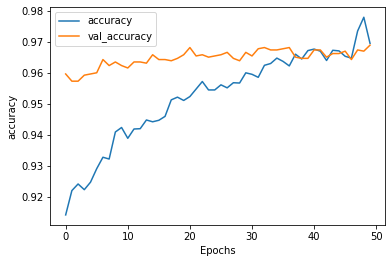

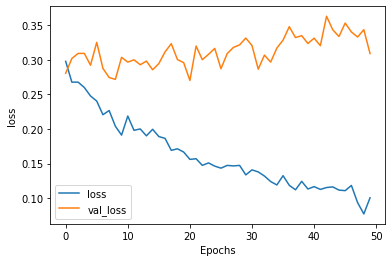

In [18]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [19]:
## Test prediction

In [20]:
filename_features_test = 'test_features.csv'
test_seqs = clean_seq(filename_features_test)
test_sequences = tokenizer.texts_to_sequences(test_seqs)

predictions = np.argmax(model.predict(test_sequences), axis=1)
print(predictions)

def decode_labels(encoded_predict_labels, le):
    test_predictions = le.inverse_transform(encoded_predict_labels)
    
    return test_predictions

test_seq_predictions = decode_labels(predictions, le)
print(test_seq_predictions)

[ 659    7  200 ...  746 1059  590]
[ 667    8  205 ...  755 1071  597]


In [21]:
def get_seq_ids(filename):
    df = pd.read_csv(filename)
    ids = df['id']
    
    return np.array(ids)

test_ids = get_seq_ids(filename_features_test)
print(test_ids)

frames = [pd.DataFrame(test_ids), pd.DataFrame(test_seq_predictions)]
output_data= np.concatenate(frames, axis=1)
output_df = pd.DataFrame(output_data)
output_df.to_csv('dna_barcode_seq_submission6_word_embedding_nn.csv', index=False,  header=["id","labels"])

[   1    2    3 ... 8304 8305 8306]


In [22]:
from google.colab import files
files.download("dna_barcode_seq_submission6_word_embedding_nn.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>